In [19]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import datetime
import random
import os

  

In [20]:
df = pd.read_csv('mental_health.csv')

In [21]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
df.shape

(101, 11)

In [ ]:
df.dtypes


Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [ ]:
df.nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [ ]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [ ]:
df = df.dropna(how='any',axis=0) 

In [ ]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [ ]:
# Split the data into features and target
X = df.drop('Do you have Depression?', axis=1)
y = df['Do you have Depression?']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
lr = LogisticRegression()
lr.fit(X_train_encoded, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)


X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded,
                                                         join='left',
                                                         axis=1,
                                                         fill_value=0)


lr = LogisticRegression()
lr.fit(X_train_encoded, y_train)
y_pred = lr.predict(X_test_encoded)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.85


In [ ]:

confusion = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[15  0]
 [ 3  2]]


In [ ]:

rf = RandomForestClassifier()


rf.fit(X_train_encoded, y_train)

RandomForestClassifier()

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)  
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded,
                                                         join='left',
                                                         axis=1,
                                                         fill_value=0)

rf = RandomForestClassifier()
rf.fit(X_train_encoded, y_train)
y_pred = rf.predict(X_test_encoded)


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:

rf = RandomForestClassifier()
rf.fit(X_train_encoded, y_train)
y_pred = rf.predict(X_test_encoded)


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
report = classification_report(y_test, y_pred)


In [ ]:

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))
print("Classification Report:\n", report)

Accuracy: 85.00%
Precision: 100.00%
Recall: 40.00%
F1 Score: 57.14%
Classification Report:
               precision    recall  f1-score   support

          No       0.83      1.00      0.91        15
         Yes       1.00      0.40      0.57         5

    accuracy                           0.85        20
   macro avg       0.92      0.70      0.74        20
weighted avg       0.88      0.85      0.82        20



In [ ]:

confusion = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[15  0]
 [ 3  2]]


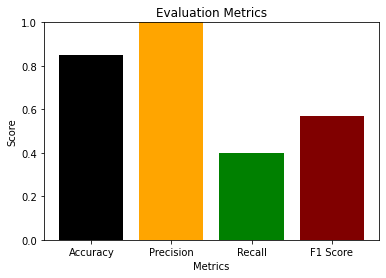

In [ ]:

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.bar(metrics, scores, color=['black', 'orange', 'green', 'maroon'])


plt.title('Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim((0, 1))


plt.show()

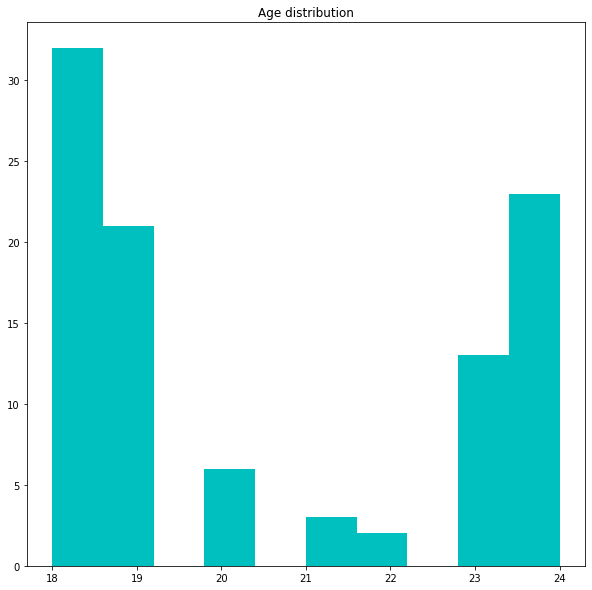

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df['Age'],color='c')
plt.title("Age distribution");

In [ ]:
df.rename(columns = {'Choose your gender': 'gender'}, inplace = True)

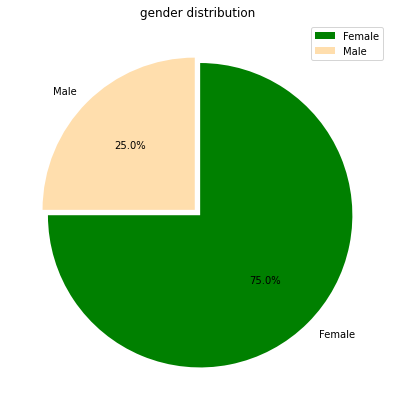

In [ ]:
plt.figure(figsize=(14,7))
plt.title("gender distribution")
g = plt.pie(df.gender.value_counts(), explode=(0.025,0.025), labels=df.gender.value_counts().index, colors=['green','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

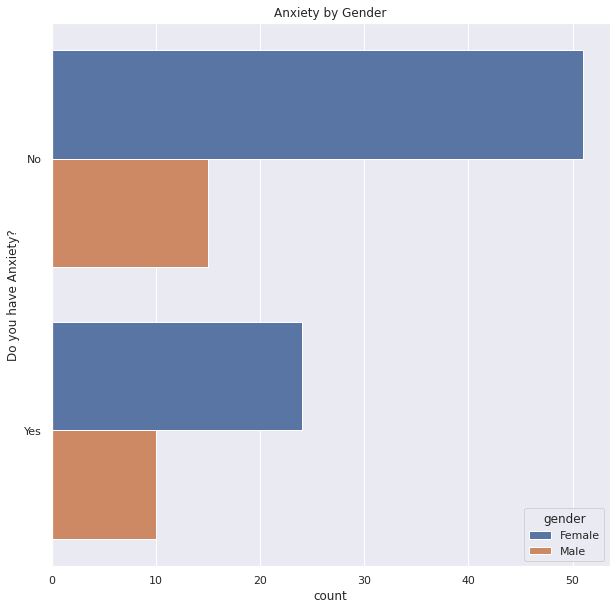

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Do you have Anxiety?", hue="gender", data=df)
plt.title("Anxiety by Gender")
plt.show()

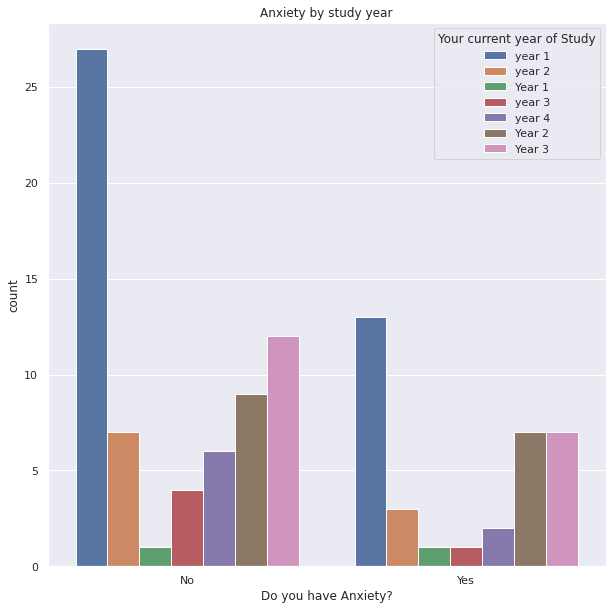

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Anxiety?", hue="Your current year of Study", data=df)
plt.title("Anxiety by study year")
plt.show()